In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cus_df = pd.read_csv('olist_customers_dataset.csv')
item_df = pd.read_csv('olist_order_items_dataset.csv')
pay_df = pd.read_csv('olist_order_payments_dataset.csv')
ord_df = pd.read_csv('olist_orders_dataset.csv')
prod_df = pd.read_csv('olist_products_dataset.csv')
sell_df = pd.read_csv('olist_sellers_dataset.csv')
cat_df = pd.read_csv('product_category_name_translation.csv')
rev_df = pd.read_csv('olist_order_reviews_dataset.csv')

main_df = pd.merge(ord_df, cus_df, 'left', 'customer_id')
main_df = pd.merge(main_df, item_df, 'left', 'order_id')
main_df = pd.merge(main_df, pay_df, 'left', 'order_id')
main_df = pd.merge(main_df, prod_df, 'left', 'product_id')
main_df = pd.merge(main_df, sell_df, 'left', 'seller_id')
main_df = pd.merge(main_df, rev_df, 'left', 'order_id')
main_df = pd.merge(main_df, cat_df, 'left', 'product_category_name')

In [3]:
main_df.drop(['order_purchase_timestamp',
              'order_approved_at',
              'shipping_limit_date',
              'product_category_name',
              'product_photos_qty',
              'review_id',
              'review_comment_title',
              'review_comment_message',
              'review_creation_date',
              'review_answer_timestamp',
              'order_delivered_carrier_date',
              'order_delivered_customer_date',
              'order_estimated_delivery_date',
              'customer_unique_id',
              'customer_city',
              'customer_state',
              'payment_sequential',
              'payment_installments',
              'seller_city',
              'seller_state'], axis=1, inplace=True)

In [4]:
main_df.groupby('order_status').nunique()['order_id'].index

Index(['approved', 'canceled', 'created', 'delivered', 'invoiced',
       'processing', 'shipped', 'unavailable'],
      dtype='object', name='order_status')

In [5]:
status = main_df.groupby('order_status').nunique().index
status_count = list(main_df.groupby('order_status').nunique()['order_id'])

In [21]:
status_count

[2, 625, 5, 96478, 314, 301, 1107, 609]

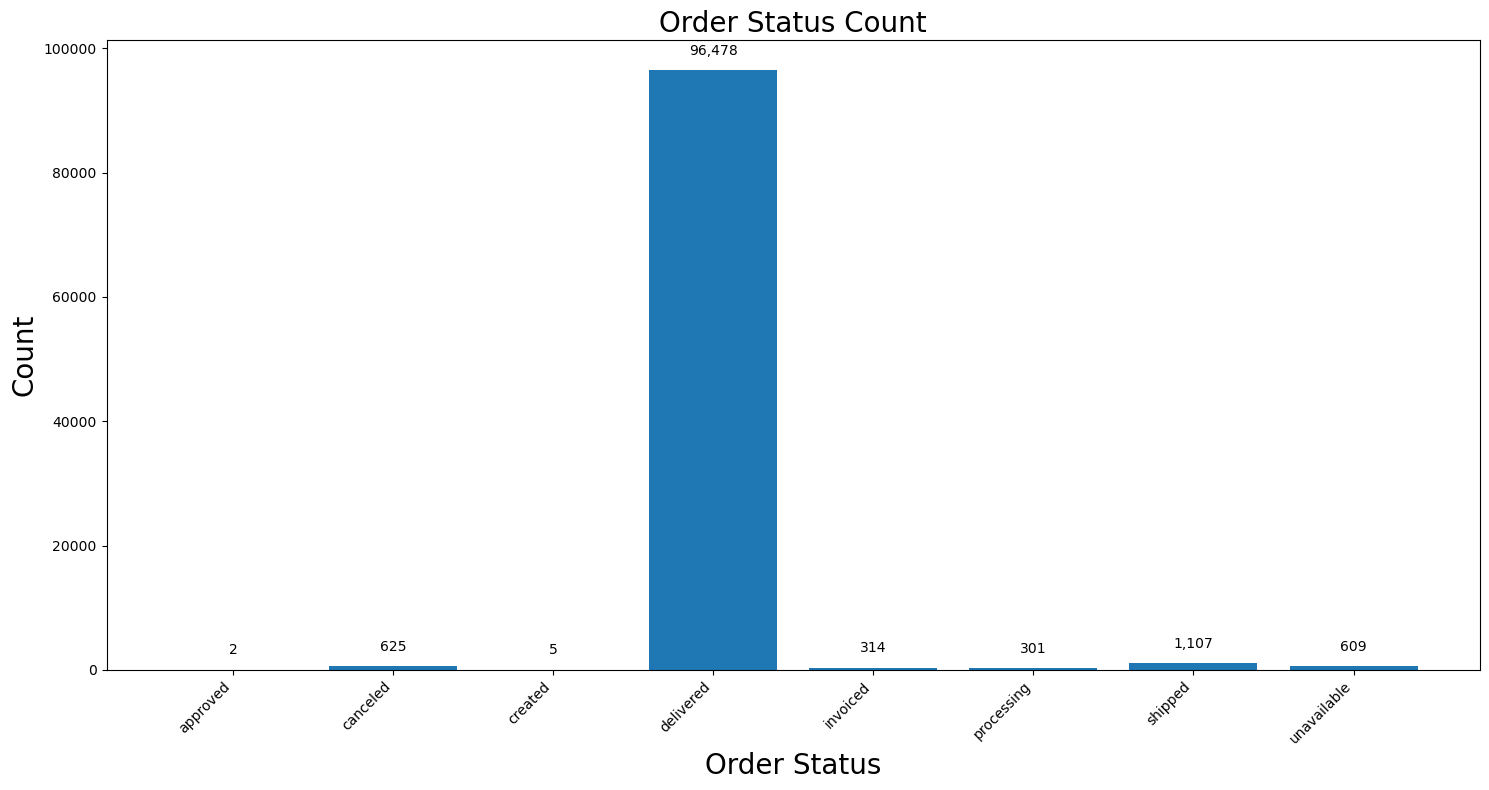

In [25]:
plt.figure(figsize=(15, 8))
bars = plt.bar(status, status_count)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=20)
plt.xlabel('Order Status', fontsize=20)
plt.title('Order Status Count', fontsize=20)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'{int(yval):,}',
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.show()

In [12]:
main_df.dropna(inplace=True)

In [13]:
current_status = list(main_df['order_status'].unique())
convert_status = [1, 0, 2, 2, 0, 2, 2]

def convert_order_status(order_status):
    ind = current_status.index(str(order_status))
    return convert_status[ind]

In [14]:
main_df['convert_status'] = main_df['order_status'].apply(convert_order_status)

In [15]:
main_df.drop(main_df[main_df['convert_status']==2].index, axis=0, inplace=True)

In [16]:
cleaned_df = main_df.drop(['order_id', 'customer_id', 'product_id', 'seller_id'], axis=1)

In [17]:
pymt = list(cleaned_df['payment_type'].unique())
pymt_no = [ x + 1 for x in range(len(pymt))]

prod_cat = list(cleaned_df['product_category_name_english'].unique())
prod_cat_no = [x + 1 for x in range(len(prod_cat))]

def convert_pymt(payment_channel):
    ind = pymt.index(str(payment_channel))
    return pymt_no[ind]

def convert_prod_cat(product_category):
    ind = prod_cat.index(str(product_category))
    return prod_cat_no[ind]

In [18]:
cleaned_df['convert_pymt'] = cleaned_df['payment_type'].apply(convert_pymt)
cleaned_df['convert_prod_cat'] = cleaned_df['product_category_name_english'].apply(convert_prod_cat)

In [19]:
cleaned_df.drop(['order_status', 'payment_type', 'product_category_name_english'], axis=1, inplace=True)

In [20]:
cleaned_df.to_csv('main_df.csv')